In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hf_data_2021 = pd.read_csv('../data/hfi_cc_2021.csv')

In [2]:
hf_data_2019 = hf_data_2021[hf_data_2021['year'] == 2019]

desired_list = ['countries', 'ISO', 'pf_score', 'ef_score']

pf_ef_comparison_2019 = hf_data_2019[desired_list]

In [3]:
hf_data_2018 = hf_data_2021[hf_data_2021['year'] == 2018]

In [6]:
pf_ef_comparison_2018 = hf_data_2018[desired_list]

The reset_index function below is necessary because by going deeper into the data set the index is set to 165 and not 0, which was causing all sorts of issues with creating the following scatter plot.  It is unnecessary to display the below chart for 2018 but in order to get the combined chart showing the change from 2018 to 2019 it was necessary to import this.

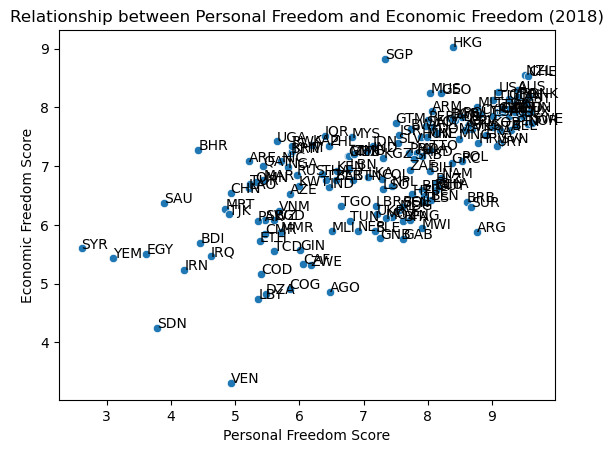

In [7]:
sns.scatterplot(data=hf_data_2018, x='pf_score', y='ef_score')
plt.xlabel('Personal Freedom Score')
plt.ylabel('Economic Freedom Score')
plt.title('Relationship between Personal Freedom and Economic Freedom (2018)')

# Reset the index of the DataFrame
hf_data_2018_reset = hf_data_2018.reset_index()

# Add country labels as annotations
for i in range(len(hf_data_2018_reset)):
    plt.annotate(hf_data_2018_reset['ISO'][i], (hf_data_2018_reset['pf_score'][i], hf_data_2018_reset['ef_score'][i]))

plt.show()

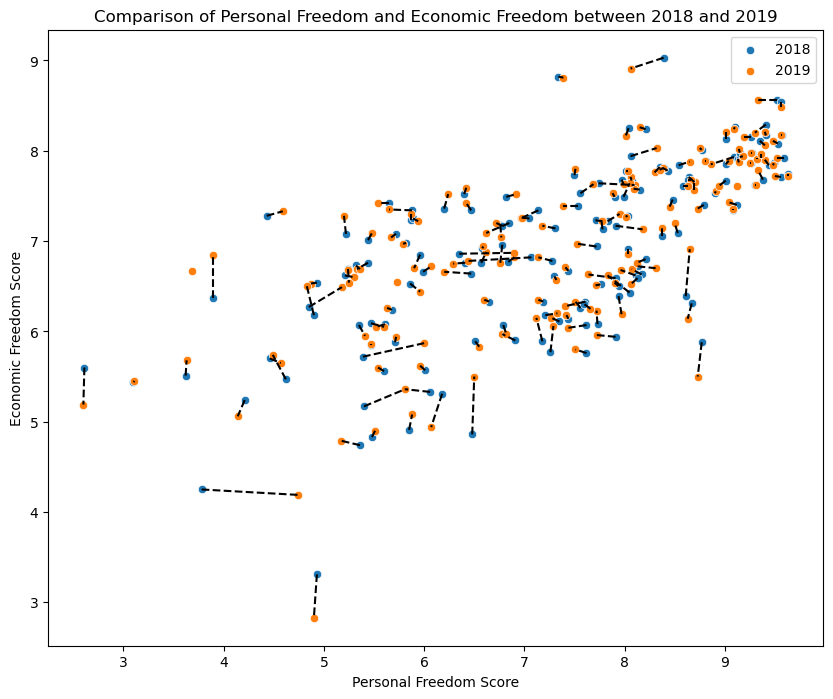

In [8]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Scatter plot for 2018 data
sns.scatterplot(data=hf_data_2018_reset, x='pf_score', y='ef_score', label='2018')

# Scatter plot for 2019 data
sns.scatterplot(data=hf_data_2019, x='pf_score', y='ef_score', label='2019')

# Add a line connecting the points between the two years
for i in range(len(hf_data_2018_reset)):
    plt.plot([hf_data_2018_reset['pf_score'][i], hf_data_2019['pf_score'][i]],
             [hf_data_2018_reset['ef_score'][i], hf_data_2019['ef_score'][i]], 'k--')

plt.xlabel('Personal Freedom Score')
plt.ylabel('Economic Freedom Score')
plt.title('Comparison of Personal Freedom and Economic Freedom between 2018 and 2019')
plt.legend()
plt.show()

I am proud that I managed to make this work, however it is not very human-readable, and in this case it is too messy to show which country or ISO connects each point.  That might be ok if what we are looking for is change and not country-specific change.

Based upon this EDA, it might present interesting comparisons to see how personal and economic freedoms changed before and after covid.
